<a href="https://colab.research.google.com/github/matiasjara987/Libros-Colab/blob/main/TallerAnalisisDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de DataSet

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = pd.read_excel('/content/drive/MyDrive/GlobalDataonSustainableEnergy.xlsx')
pd.set_option('display.max_rows', None)

# Tratamiento de Datos Vacíos o Nulos

In [ ]:
print(df.isna().sum())

Entidad                                                          0
Año                                                              0
Acceso a la electricidad (% de la población)                     0
Acceso a combustibles limpios para cocinar                       8
Capacidad de generación de electricidad renovable per cápita    45
Electricidad a partir de combustibles fósiles (TWh)              0
Electricidad a partir de nuclear (TWh)                           5
Electricidad a partir de renovables (TWh)                        0
Electricidad de baja emisión de carbono (% del total)            1
Consumo de energía primaria per cápita (kWh/persona)             0
Crecimiento del PIB                                             16
PIB per cápita                                                  16
Densidad (P/Km2)                                                 0
Área terrestre (Km2)                                             0
Latitud                                                       

In [ ]:
columnas = ['Acceso a combustibles limpios para cocinar', 'Capacidad de generación de electricidad renovable per cápita', 'Electricidad a partir de nuclear (TWh)', 'Electricidad de baja emisión de carbono (% del total)', 'Crecimiento del PIB', 'PIB per cápita']
def reemplazar_nulos(df, columnas):

    for col in columnas:
        media = df[col].mean()
        m = round(media, 0)
        df[col] = df[col].fillna(m)

    return df
df = reemplazar_nulos(df, columnas)

# **Análisis y Tratamiento De** *Outliers*

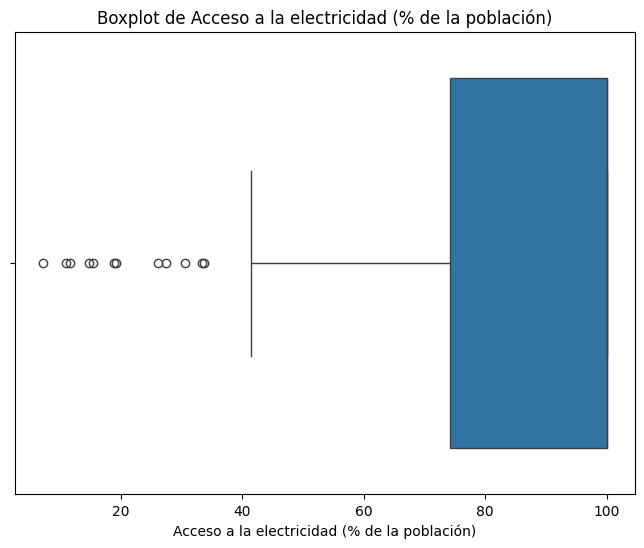

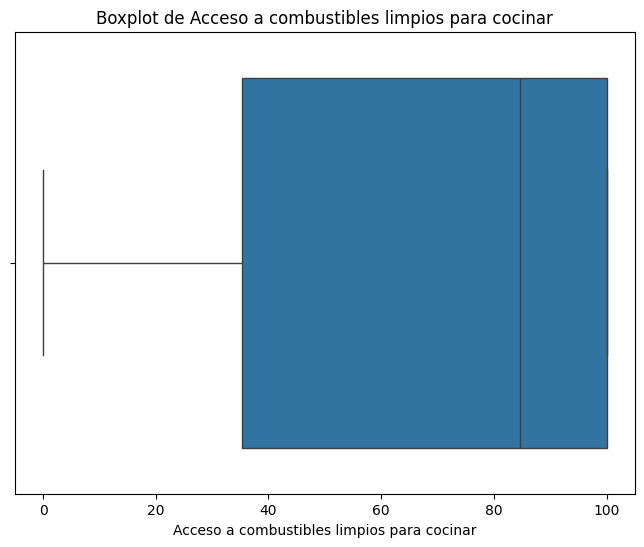

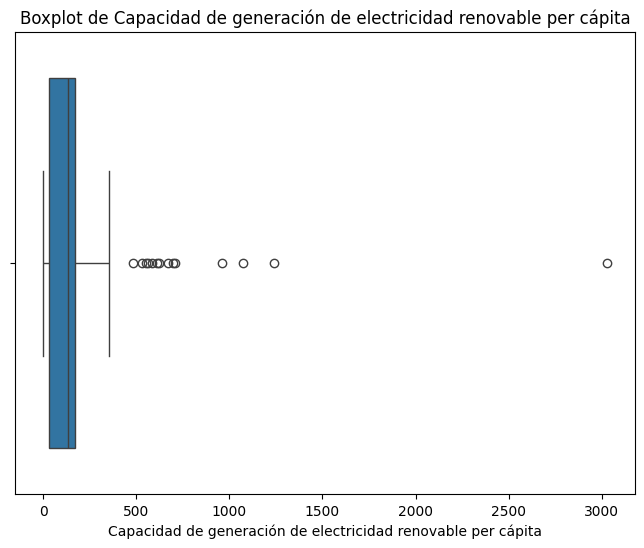

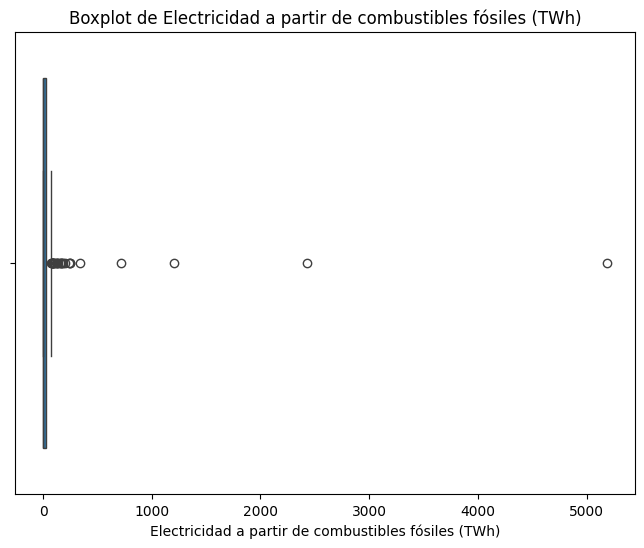

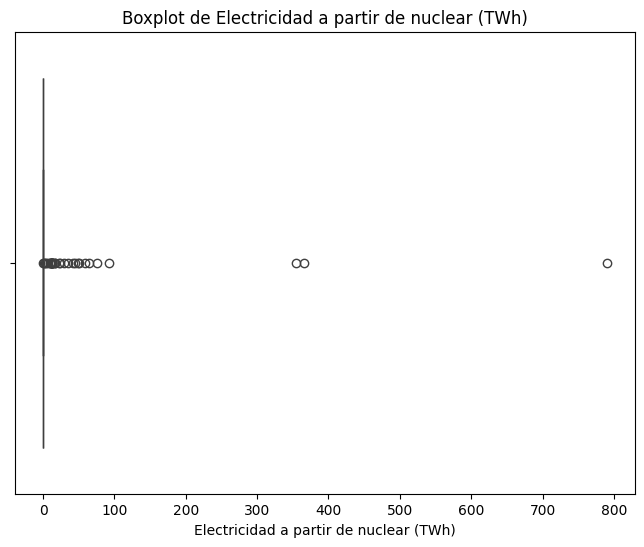

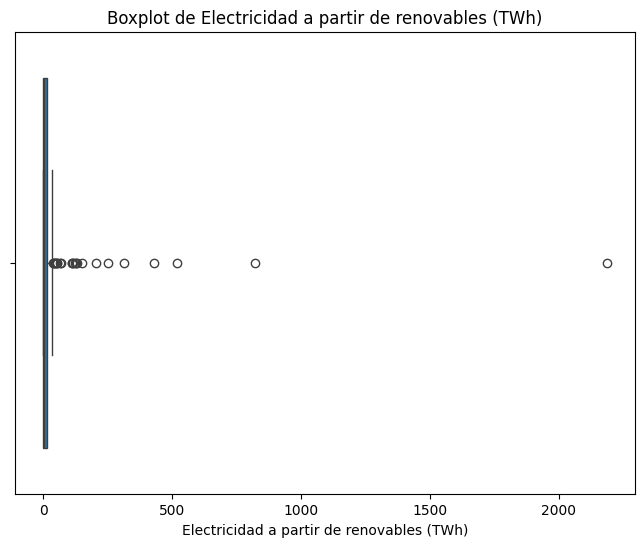

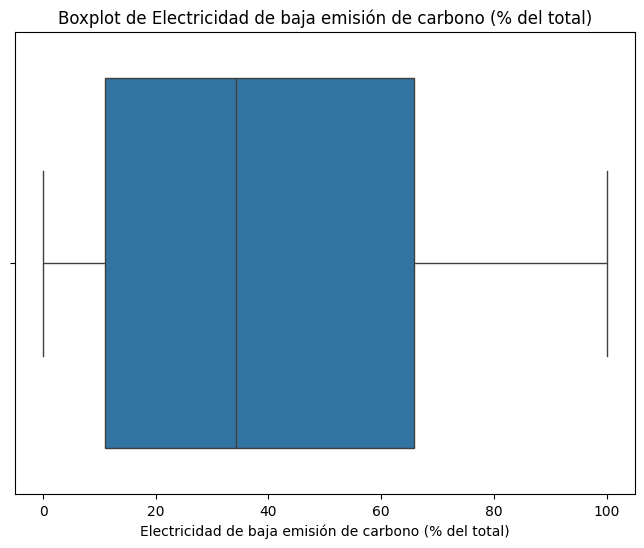

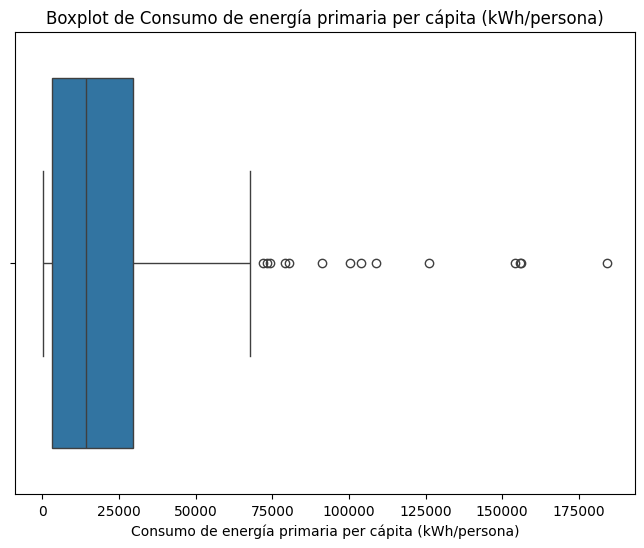

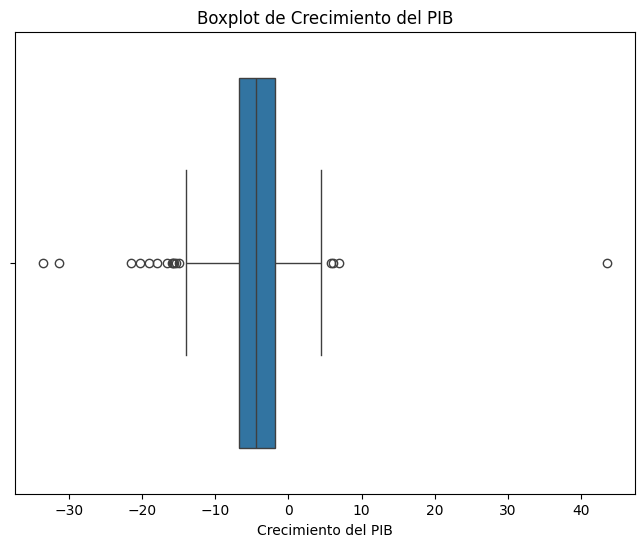

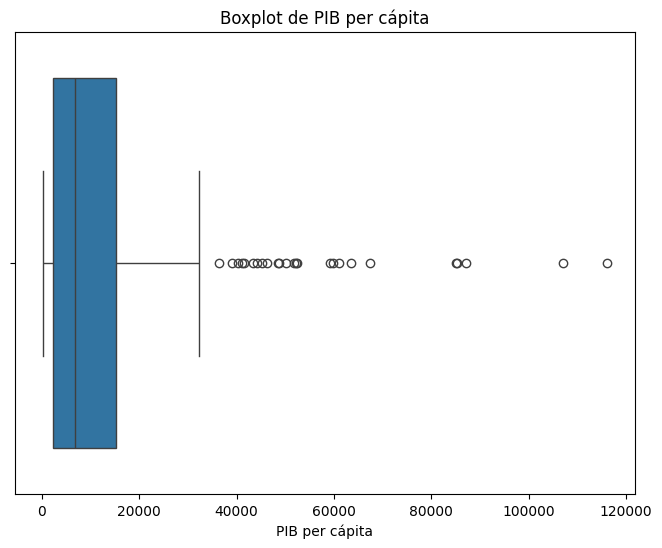

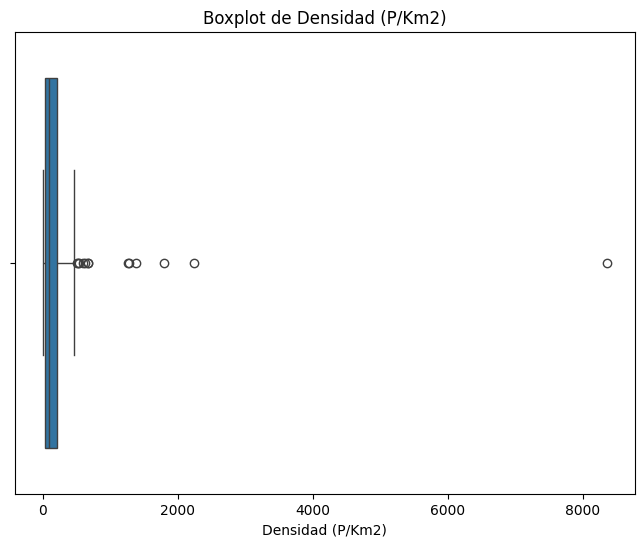

In [ ]:
df_outliers= df.drop(columns=['Entidad', 'Año', 'Longitud', 'Latitud', 'Área terrestre (Km2)'])
def generar_boxplots(df):
    columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

    for columna in columnas_numericas:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[columna])
        plt.title(f'Boxplot de {columna}')
        plt.show()

generar_boxplots(df_outliers)

# *Matriz de Correlación*

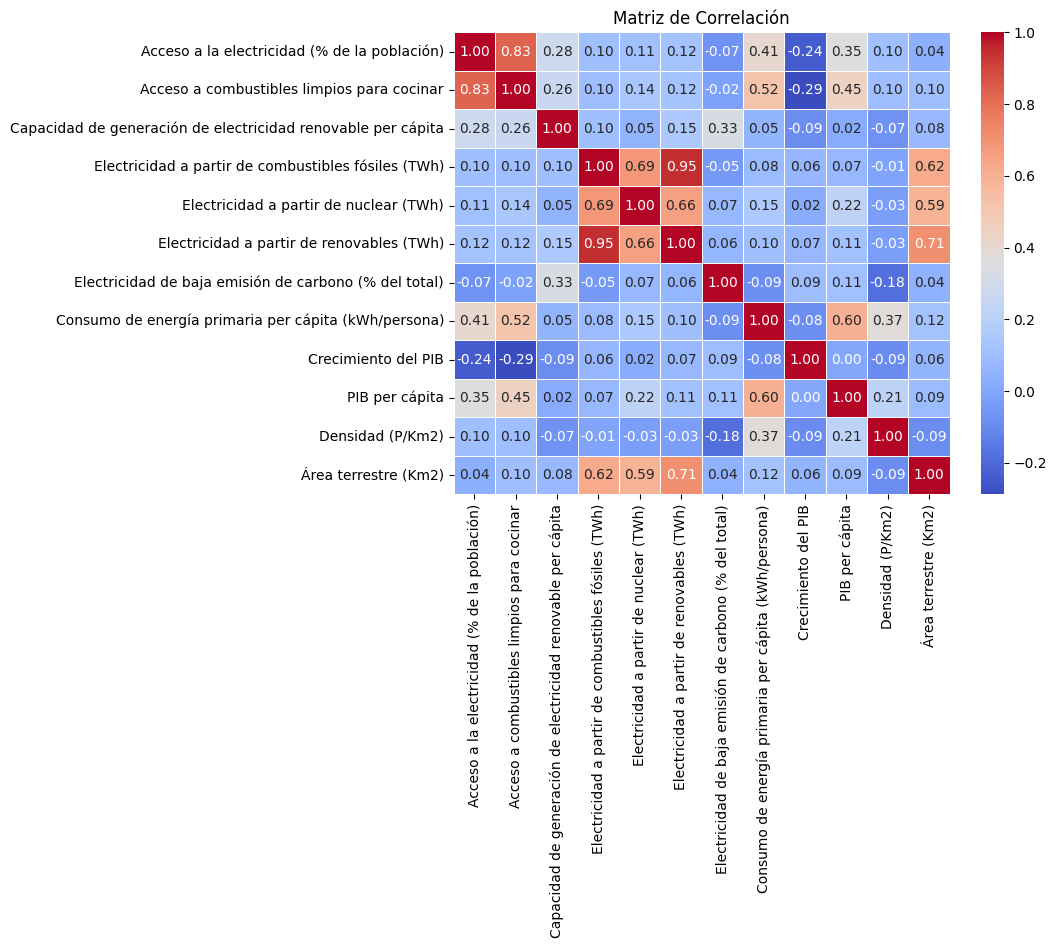

In [ ]:
dffil= df.drop(columns=['Entidad', 'Año', 'Longitud', 'Latitud'])
m= dffil.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(m, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Matriz Mejorada

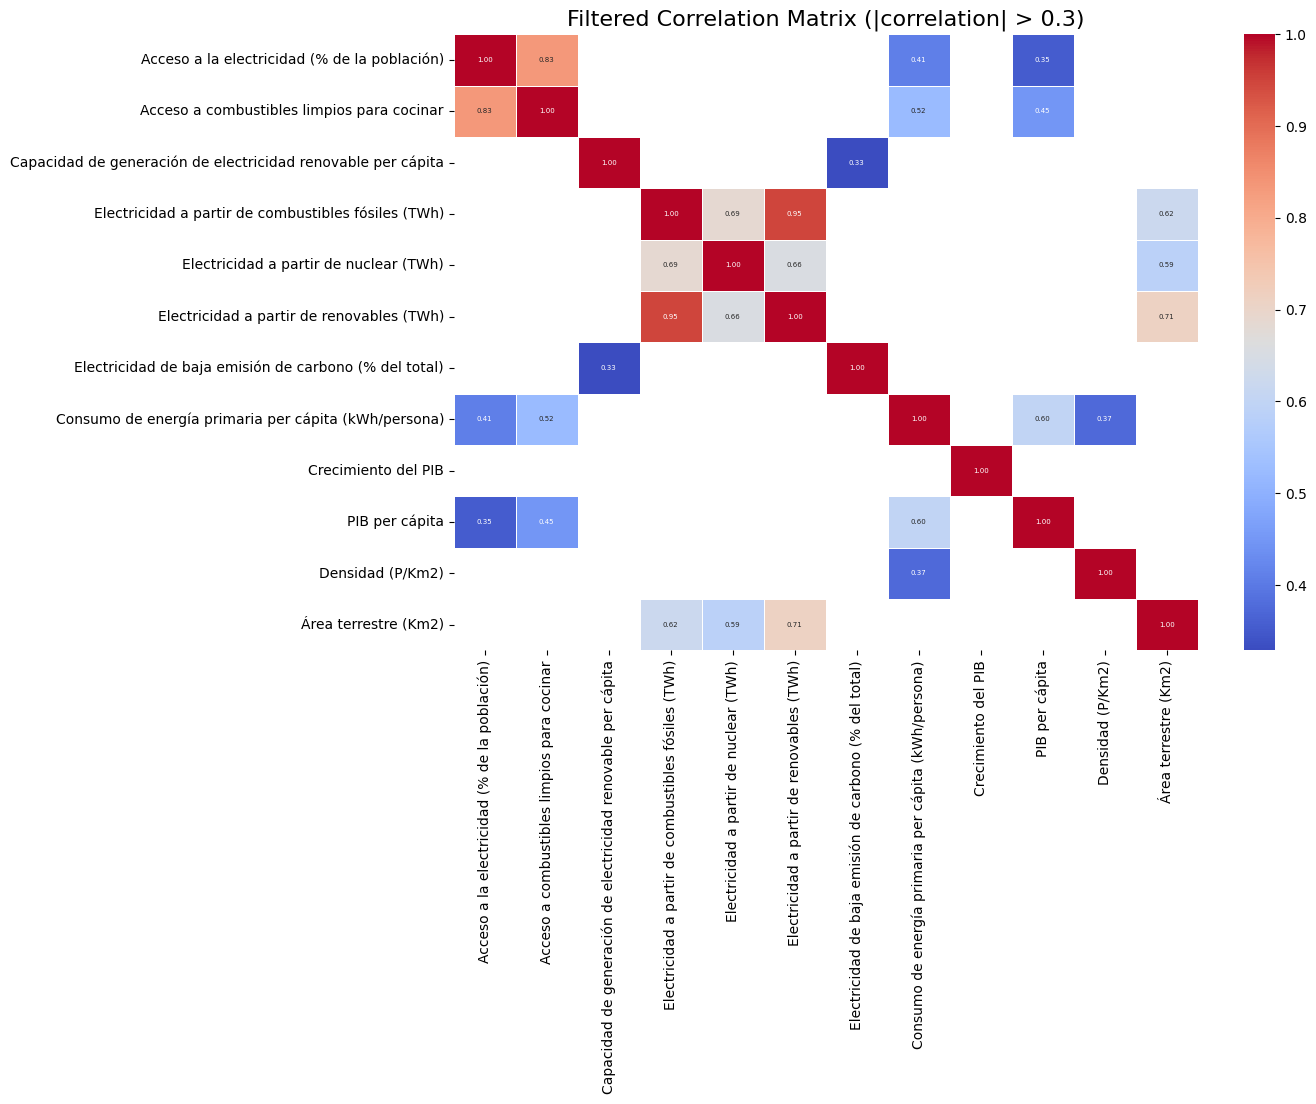

In [ ]:
plt.figure(figsize=(12, 8))
mask = (m < 0.3) & ( m> -0.3)
sns.heatmap(m, annot=True, fmt=".2f", cmap="coolwarm",
            cbar=True, linewidths=0.5, annot_kws={"size": 5}, mask=mask)

plt.title('Filtered Correlation Matrix (|correlation| > 0.3)', fontsize=16)
plt.show()


#Regresiones Lineales Simples

## Regresión Lineal Simple PER cápita vs Consumo de energía


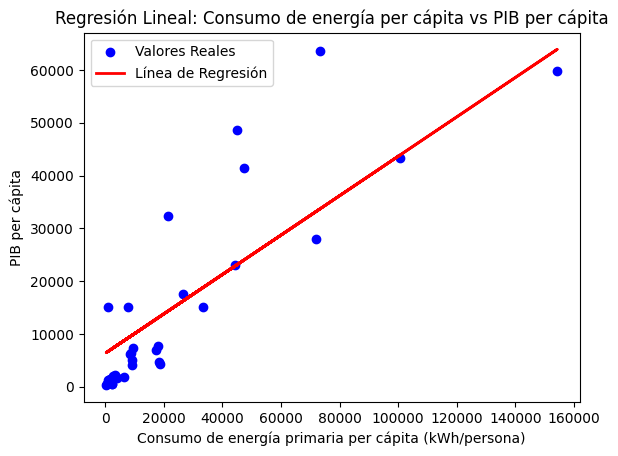

In [ ]:
model = LinearRegression()

X = df[['Consumo de energía primaria per cápita (kWh/persona)']]
y = df['PIB per cápita'].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Valores Reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')

plt.xlabel('Consumo de energía primaria per cápita (kWh/persona)')
plt.ylabel('PIB per cápita')
plt.title('Regresión Lineal: Consumo de energía per cápita vs PIB per cápita')
plt.legend()
plt.show()

In [ ]:
X_train_with_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_with_const)
results = model_sm.fit()
summary = results.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PIB per cápita   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     57.98
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           3.89e-12
Time:                        00:41:53   Log-Likelihood:                -1558.8
No. Observations:                 139   AIC:                             3122.
Df Residuals:                     137   BIC:                             3128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 6336.5881   1955.562      3.240      0.001    2469.598    1.02e+04
Consumo de energía primaria per cápita (kWh/persona)     0.3731      0.049      7.614      0.000       0.276       0.470
==============================================================================
Omnibus:                       97.701   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              601.181
Skew:                           2.576   Prob(JB):                    2.85e-131
Kurtosis:                      11.790   Cond. No.                     5.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpretación
**P-Value**
Este valor p es menor que 0.05, lo que indica que el efecto del consumo de energía sobre el PIB per cápita es estadísticamente significativo. Esto significa que podemos rechazar la hipótesis nula de que el coeficiente del consumo de energía es igual a cero, sugiriendo que hay una relación positiva entre el consumo de energía y el PIB per cápita.

**R^2**  
Aproximadamente el 29.7% de la variación en el PIB per cápita puede ser explicada por el consumo de energía primaria per cápita. Esto sugiere que hay otros factores no incluidos en el modelo que también afectan el PIB per cápita.

## Regresión Lineal Energia Fosiles vs Nuclear

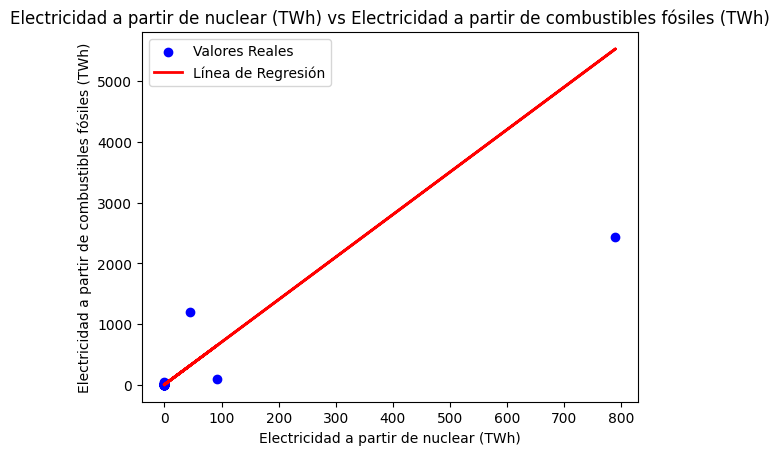

In [ ]:
model = LinearRegression()

X = df[['Electricidad a partir de nuclear (TWh)']]
y = df['Electricidad a partir de combustibles fósiles (TWh)'].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Valores Reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')

plt.xlabel('Electricidad a partir de nuclear (TWh)')
plt.ylabel('Electricidad a partir de combustibles fósiles (TWh)')
plt.title('Electricidad a partir de nuclear (TWh) vs Electricidad a partir de combustibles fósiles (TWh)')
plt.legend()
plt.show()

In [ ]:
X_train_with_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_with_const)
results = model_sm.fit()
summary = results.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                             OLS Regression Results                                            
===============================================================================================================
Dep. Variable:     Electricidad a partir de combustibles fósiles (TWh)   R-squared:                       0.487
Model:                                                             OLS   Adj. R-squared:                  0.483
Method:                                                  Least Squares   F-statistic:                     129.8
Date:                                                 Fri, 25 Oct 2024   Prob (F-statistic):           1.42e-21
Time:                                                         00:41:53   Log-Likelihood:                -997.86
No. Observations:                                                  139   AIC:                             2000.
Df Residuals:                                                      137   BIC:                             2006.
Df Model:                                                            1                                         
Covariance Type:                                             nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      6.1679     27.772      0.222      0.825     -48.750      61.085
Electricidad a partir de nuclear (TWh)     6.9886      0.613     11.395      0.000       5.776       8.201
==============================================================================
Omnibus:                       85.976   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17689.023
Skew:                           0.783   Prob(JB):                         0.00
Kurtosis:                      58.243   Cond. No.                         46.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretación
**R^2**
Interpretación: Aproximadamente el 48.7% de la variación en la electricidad generada a partir de combustibles fósiles (TWh) puede ser explicada por las variables incluidas en el modelo. Esto sugiere que el modelo tiene un poder explicativo moderado, pero también indica que hay otros factores no incluidos que pueden influir en la generación de electricidad a partir de combustibles fósiles.

**Interpretación del p-value**
Este valor p es extremadamente bajo, mucho menor que 0.05. Indica que el modelo es estadísticamente significativo y que al menos una de las variables independientes tiene un efecto significativo en la variable dependiente, que en este caso es la electricidad a partir de combustibles fósiles. Por lo tanto, podemos rechazar la hipótesis nula de que los coeficientes son iguales a cero.

# Regresiones Lineales Multiples

## Multiple 1

In [ ]:
model = LinearRegression()
X = df[['Acceso a la electricidad (% de la población)',
           'Consumo de energía primaria per cápita (kWh/persona)',
           'Electricidad a partir de combustibles fósiles (TWh)']]

y= df['Crecimiento del PIB']
X = X.dropna()
y = y.loc[X.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
import statsmodels.api as sm
X_train_with_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_with_const)
results = model_sm.fit()
summary = results.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Crecimiento del PIB   R-squared:                       0.052
Model:                             OLS   Adj. R-squared:                  0.031
Method:                  Least Squares   F-statistic:                     2.490
Date:                 Fri, 25 Oct 2024   Prob (F-statistic):             0.0630
Time:                         00:41:53   Log-Likelihood:                -457.03
No. Observations:                  139   AIC:                             922.1
Df Residuals:                      135   BIC:                             933.8
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7988      2.172      0.368      0.714      -3.497       5.094
Acceso a la electricidad (% de la población)            -0.0588      0.026     -2.280      0.024      -0.110      -0.008
Consumo de energía primaria per cápita (kWh/persona) -4.316e-06   1.93e-05     -0.223      0.824   -4.26e-05     3.4e-05
Electricidad a partir de combustibles fósiles (TWh)      0.0014      0.001      1.131      0.260      -0.001       0.004
==============================================================================
Omnibus:                      105.276   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3013.740
Skew:                           2.103   Prob(JB):                         0.00
Kurtosis:                      25.420   Cond. No.                     1.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

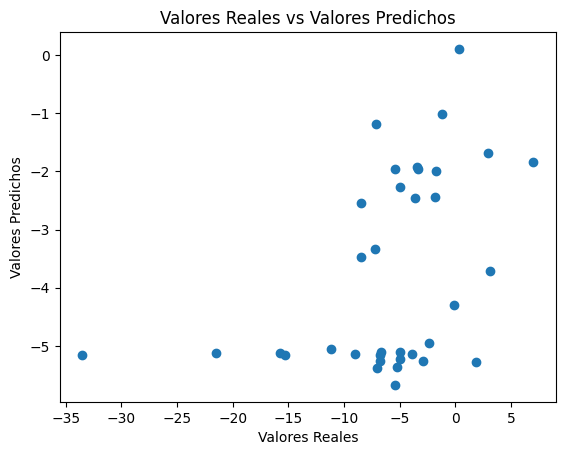

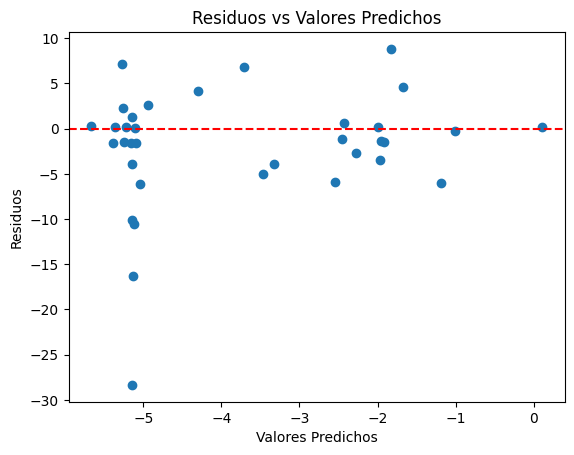

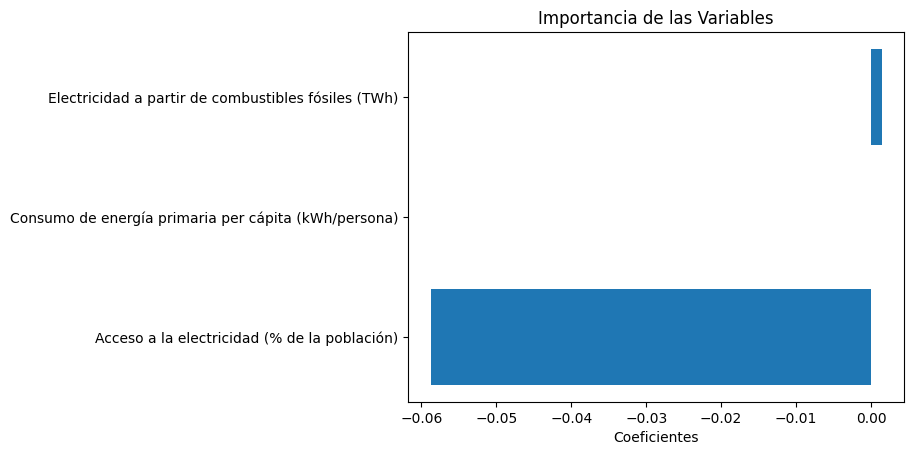

In [ ]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Valores Predichos')
plt.show()
residuos = y_test - y_pred

plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Predichos')
plt.show()

coefs = model.coef_
variables = ['Acceso a la electricidad (% de la población)',
           'Consumo de energía primaria per cápita (kWh/persona)',
           'Electricidad a partir de combustibles fósiles (TWh)']
plt.barh(variables, coefs)
plt.xlabel('Coeficientes')
plt.title('Importancia de las Variables')
plt.show()

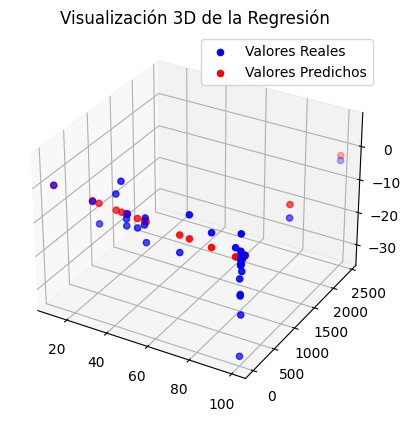

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X_test_2d = X_test[['Acceso a la electricidad (% de la población)', 'Electricidad a partir de combustibles fósiles (TWh)']]
ax.scatter(X_test_2d.iloc[:, 0], X_test_2d.iloc[:, 1], y_test, color='blue', label='Valores Reales')
ax.scatter(X_test_2d.iloc[:, 0], X_test_2d.iloc[:, 1], y_pred, color='red', label='Valores Predichos')

plt.title('Visualización 3D de la Regresión')
plt.legend()
plt.show()


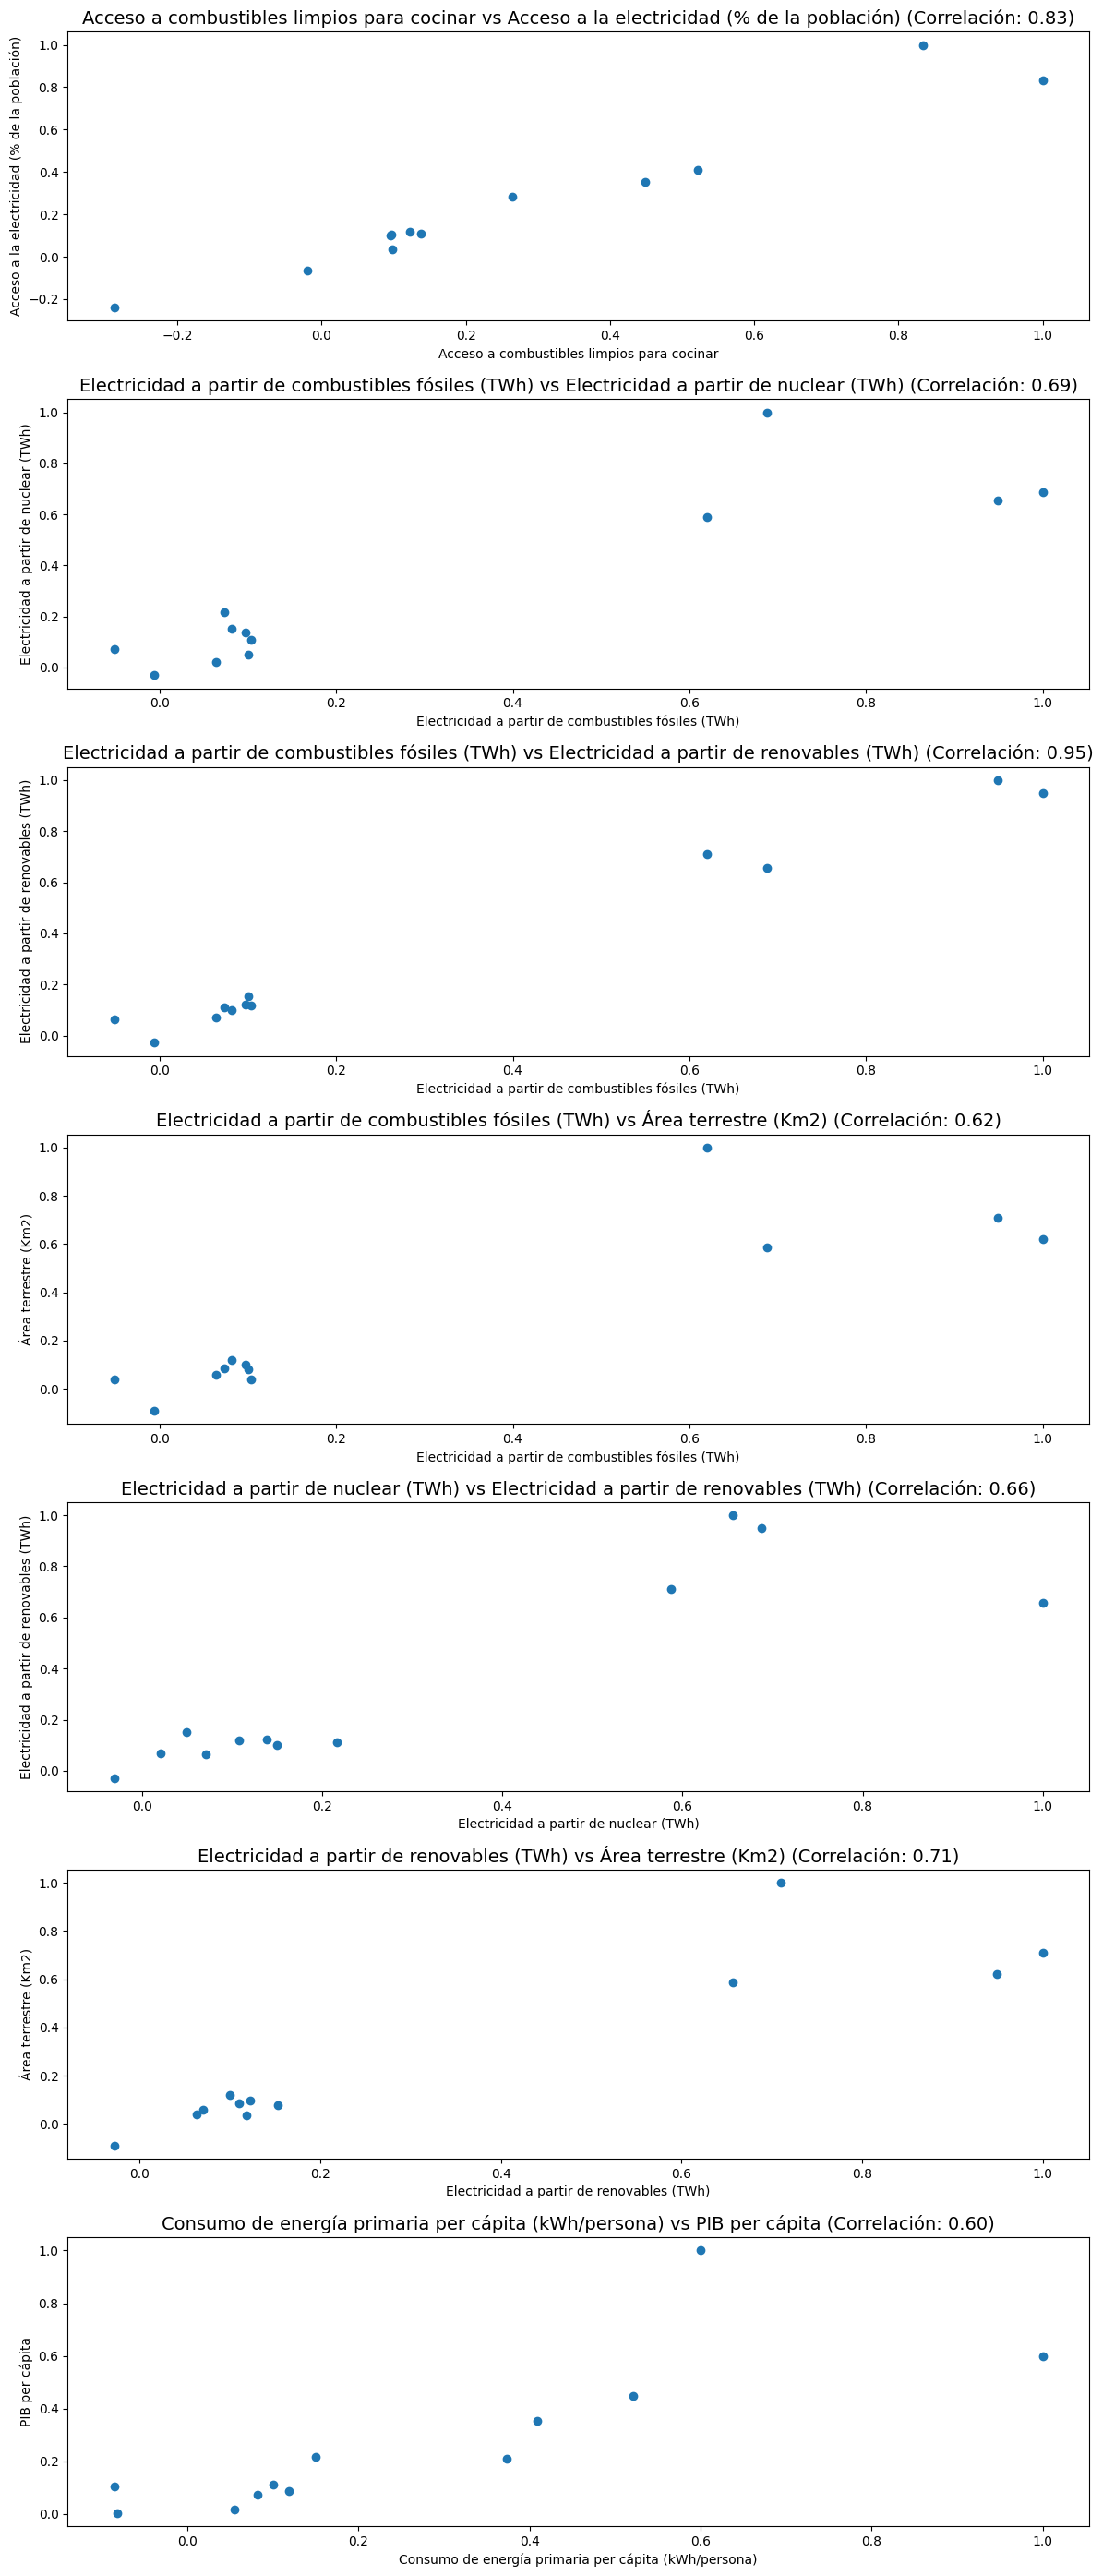

In [ ]:
import matplotlib.pyplot as plt
high_corr_pairs = m[(m > 0.6) | (m < -0.6)].stack().index.tolist()
high_corr_pairs = [(a, b) for a, b in high_corr_pairs if a < b]
plt.figure(figsize=(12, len(high_corr_pairs) * 4))
for i, (x, y) in enumerate(high_corr_pairs, 1):
    corr_value = m.loc[x, y]

    plt.subplot(len(high_corr_pairs), 1, i)
    plt.scatter(m[x], m[y])

    plt.title(f'{x} vs {y} (Correlación: {corr_value:.2f})', fontsize=14)
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()
plt.show()

### Interpretación


```
# Valor de R²: El valor de R² = 0.052 indica que el modelo solo explica el 5.2% de la variación en el Crecimiento del PIB. Esto significa que el modelo no tiene un buen poder explicativo y otras variables no incluidas en el modelo pueden estar influyendo en el crecimiento del PIB.

p-value del modelo completo: El p-value del modelo (Prob F-statistic) = 0.0630, lo cual es mayor que el nivel de significancia común de 0.05. Esto implica que, en su conjunto, las variables independientes utilizadas no son estadísticamente significativas para predecir el Crecimiento del PIB.

Conclusión: El modelo no es lo suficientemente fuerte para explicar el Crecimiento del PIB y las variables seleccionadas no son estadísticamente significativas a un nivel del 95%.
```

## Multiple 2

In [ ]:
model = LinearRegression()
# ACA ESTAN DEFINIDAS LAS VARIABLES INDEPENDIENTES
X = df[['Acceso a combustibles limpios para cocinar',
           'PIB per cápita',
           'Electricidad a partir de combustibles fósiles (TWh)']].astype(float)
y= df['Consumo de energía primaria per cápita (kWh/persona)'].astype(float)
X = X.dropna()
y = y.loc[X.index]  # Alinear con las filas de X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
X_train_with_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_with_const)
results = model_sm.fit()
summary = results.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                             OLS Regression Results                                             
================================================================================================================
Dep. Variable:     Consumo de energía primaria per cápita (kWh/persona)   R-squared:                       0.387
Model:                                                              OLS   Adj. R-squared:                  0.373
Method:                                                   Least Squares   F-statistic:                     28.41
Date:                                                  Fri, 25 Oct 2024   Prob (F-statistic):           2.63e-14
Time:                                                          00:41:56   Log-Likelihood:                -1602.1
No. Observations:                                                   139   AIC:                             3212.
Df Residuals:                                                       135   BIC:                             3224.
Df Model:                                                             3                                         
Covariance Type:                                              nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                               -4651.0299   4630.922     -1.004      0.317   -1.38e+04    4507.509
Acceso a combustibles limpios para cocinar            284.7030     64.647      4.404      0.000     156.850     412.556
PIB per cápita                                          0.6015      0.108      5.569      0.000       0.388       0.815
Electricidad a partir de combustibles fósiles (TWh)     1.1618      4.779      0.243      0.808      -8.290      10.613
==============================================================================
Omnibus:                      110.544   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              868.026
Skew:                           2.912   Prob(JB):                    3.24e-189
Kurtosis:                      13.769   Cond. No.                     5.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

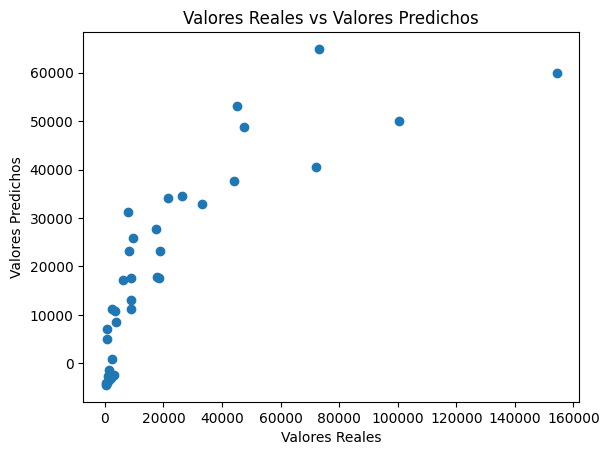

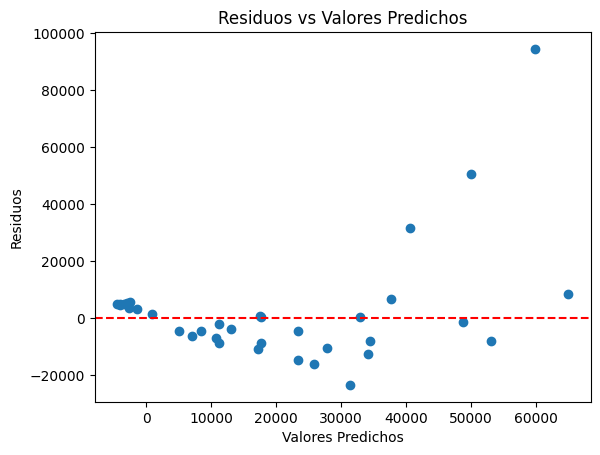

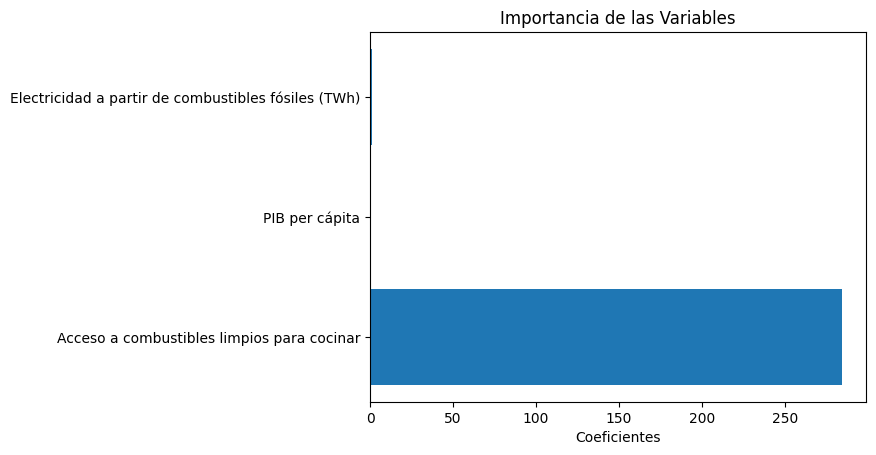

In [ ]:
# Obtener las predicciones del conjunto de prueba
y_pred = model.predict(X_test)

# Crear el gráfico
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Valores Predichos')
plt.show()

# Calcular los residuos
residuos = y_test - y_pred

# Graficar los residuos
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Predichos')
plt.show()


# Extraer los coeficientes del modelo
coefs = model.coef_
# Nombres de las variables independientes
variables = ['Acceso a combustibles limpios para cocinar',
           'PIB per cápita',
           'Electricidad a partir de combustibles fósiles (TWh)']

# Crear el gráfico de barras
plt.barh(variables, coefs)
plt.xlabel('Coeficientes')
plt.title('Importancia de las Variables')
plt.show()

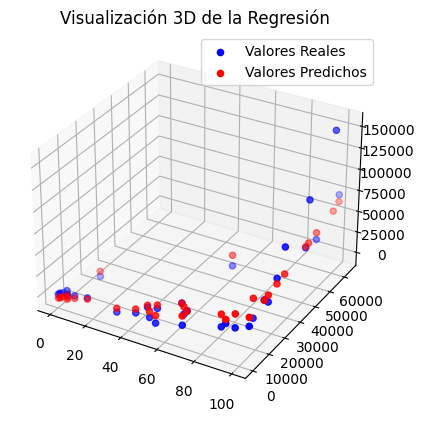

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Crear un gráfico 3D con dos variables independientes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tomar solo las primeras dos variables para el gráfico
X_test_2d = X_test[['Acceso a combustibles limpios para cocinar',
           'PIB per cápita', ]]
# Graficar los puntos reales y los predichos
ax.scatter(X_test_2d.iloc[:, 0], X_test_2d.iloc[:, 1], y_test, color='blue', label='Valores Reales')
ax.scatter(X_test_2d.iloc[:, 0], X_test_2d.iloc[:, 1], y_pred, color='red', label='Valores Predichos')
plt.title('Visualización 3D de la Regresión')
plt.legend()
plt.show()


### Intrepretación


```
# R-squared (R²): 0.387:

El modelo explica el 38.7% de la variabilidad del Consumo de energía primaria per cápita. Esto indica que las tres variables independientes utilizadas en el modelo tienen un poder explicativo moderado sobre la variable dependiente.
El R² ajustado es ligeramente menor, lo que sugiere que el ajuste del modelo se penaliza ligeramente por el número de variables independientes incluidas. Sin embargo, sigue indicando una relación significativa entre las variables independientes y el Consumo de energía primaria per cápita.

El p-value es extremadamente bajo, lo que significa que el modelo en su conjunto es altamente significativo (muy por debajo del nivel de significancia del 0.05). Las variables independientes seleccionadas tienen una relación estadísticamente significativa con la variable dependiente.
```



# Unir coordenadas

In [ ]:

df['Coordenadas'] = df['Latitud'].astype(str) + ', ' + df['Longitud'].astype(str)
df = df.drop(columns=['Latitud', 'Longitud'])
df.head()

,Entidad,Año,Acceso a la electricidad (% de la población),Acceso a combustibles limpios para cocinar,Capacidad de generación de electricidad renovable per cápita,Electricidad a partir de combustibles fósiles (TWh),Electricidad a partir de nuclear (TWh),Electricidad a partir de renovables (TWh),Electricidad de baja emisión de carbono (% del total),Consumo de energía primaria per cápita (kWh/persona),Crecimiento del PIB,PIB per cápita,Densidad (P/Km2),Área terrestre (Km2),Coordenadas
0,Afghanistan,2020,97.70000,33.2,9.35,0.12,0.0,0.68,85.000000,702.888,-2.351101,516.747871,60,652230,"33.93911, 67.709953"
1,Albania,2020,100.00000,81.3,170.00,0.00,0.0,5.31,100.000000,11158.003,-3.955398,5246.292306,105,28748,"41.153332, 20.168331"
2,Algeria,2020,99.80413,99.7,15.64,72.01,0.0,0.72,0.989963,14933.807,-5.100000,3306.858208,18,2381741,"28.033886, 1.659626"
3,Angola,2020,46.89061,50.2,115.43,4.49,0.0,12.10,72.935500,3527.160,-5.399987,1776.166868,26,1246700,"-11.202692, 17.873887"
4,Antigua and Barbuda,2020,100.00000,100.0,167.98,0.31,0.0,0.02,6.060606,27785.227,-20.192371,13992.744480,223,443,"17.060816, -61.796428"


# Exportación de datos

In [ ]:
df.to_excel("archivo.xlsx", index=False)